
Train A Noise Detector:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
# Importing the data set
df = pd.read_csv("train.csv")
print(df.shape)
print(df.head())


(2000, 8)
        dbfs       rms           avg  ...  dcoffset     filename  target
0 -23.342901  0.068081  9.726773e-06  ...  0.000000  BPCRGRYCXPI  silent
1 -32.613091  0.023555 -1.376716e-05  ... -0.000061  UE4OHIQ6JJO   noise
2 -33.918120  0.020217 -2.388173e-05  ... -0.000061  N0B0Z81N2KQ   noise
3 -28.287812  0.038521 -2.014348e-06  ... -0.000031  IL6D7IEAKXH  silent
4 -24.189081  0.061746 -6.716756e-07  ... -0.000031  6VKOI64H5QS  silent

[5 rows x 8 columns]


In [4]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   dbfs      2000 non-null   float64
 1   rms       2000 non-null   float64
 2   avg       2000 non-null   float64
 3   mode      2000 non-null   float64
 4   std       2000 non-null   float64
 5   dcoffset  2000 non-null   float64
 6   filename  2000 non-null   object 
 7   target    2000 non-null   object 
dtypes: float64(6), object(2)
memory usage: 125.1+ KB


,dbfs,rms,avg,mode,std,dcoffset
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,-24.365061,0.076494,-0.000208,-0.078601,0.076394,-0.001530
std,8.112060,0.063158,0.005856,0.160891,0.063007,0.014291
min,-67.845098,0.000406,-0.012704,-1.218606,0.000406,-0.257812
25%,-27.517713,0.041780,-0.000136,-0.093902,0.041780,-0.000178
50%,-24.031654,0.061847,-0.000014,-0.001987,0.061847,-0.000031
75%,-21.093569,0.086572,0.000004,0.000000,0.086543,0.000000
max,38.687602,0.463202,0.080826,0.999939,0.463201,0.024780


In [5]:
# Data preprocessing
df = df.drop('filename', axis=1)
target = df['target']
df = df.drop('target', axis=1)
df.head()

,dbfs,rms,avg,mode,std,dcoffset
0,-23.342901,0.068081,9.726773e-06,0.000000,0.068081,0.000000
1,-32.613091,0.023555,-1.376716e-05,-0.033556,0.023555,-0.000061
2,-33.918120,0.020217,-2.388173e-05,-0.020961,0.020217,-0.000061
3,-28.287812,0.038521,-2.014348e-06,0.000122,0.038521,-0.000031
4,-24.189081,0.061746,-6.716756e-07,-0.000122,0.061746,-0.000031


In [6]:
columns = df.columns
missing=[]
for i in columns:
  s=pd.Series(df[i])
  if s.isnull().values.any()==True:
    missing.append(i)
print(missing)

[]


In [7]:
# Checking for NULL values
df.isnull()

,dbfs,rms,avg,mode,std,dcoffset
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
1995,False,False,False,False,False,False
1996,False,False,False,False,False,False
1997,False,False,False,False,False,False
1998,False,False,False,False,False,False


In [8]:
# Correlation
df.corr()

,dbfs,rms,avg,mode,std,dcoffset
dbfs,1.000000,0.751579,0.448142,-0.507775,0.745904,-0.518250
rms,0.751579,1.000000,0.145995,-0.811643,0.999897,-0.176478
avg,0.448142,0.145995,1.000000,-0.102367,0.133597,-0.829438
mode,-0.507775,-0.811643,-0.102367,1.000000,-0.812288,0.090193
std,0.745904,0.999897,0.133597,-0.812288,1.000000,-0.162709
dcoffset,-0.518250,-0.176478,-0.829438,0.090193,-0.162709,1.000000


In [9]:
target.head()

0    silent
1     noise
2     noise
3    silent
4    silent
Name: target, dtype: object

In [12]:
# Using MinMaxScaler to Normalize
from sklearn.preprocessing import MinMaxScaler
std_scale = MinMaxScaler() 
std_scale

MinMaxScaler(copy=True, feature_range=(0, 1))

In [13]:
df = std_scale.fit_transform(df)
df = pd.DataFrame(data = df, columns = columns)
df.describe()

,dbfs,rms,avg,mode,std,dcoffset
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,0.408138,0.164409,0.133598,0.513853,0.164194,0.906898
std,0.076146,0.136471,0.062609,0.072521,0.136145,0.050572
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.378545,0.089399,0.134367,0.506955,0.089399,0.911681
50%,0.411268,0.132760,0.135674,0.548386,0.132760,0.912203
75%,0.438847,0.186186,0.135863,0.549282,0.186123,0.912311
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


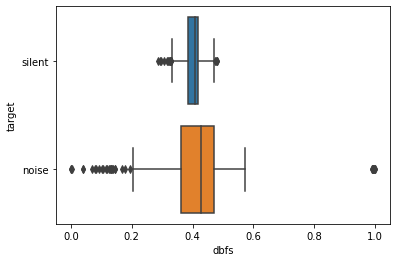

In [14]:
#Boxplots
sns.boxplot(x=df['dbfs'],y=target)

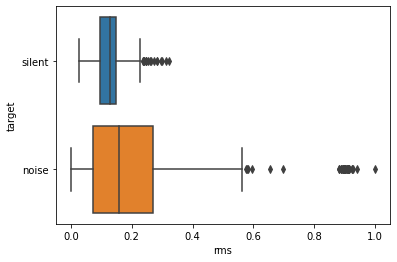

In [15]:
sns.boxplot(x=df['rms'],y=target)

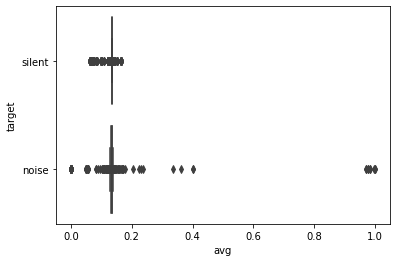

In [16]:
sns.boxplot(x=df['avg'],y=target)

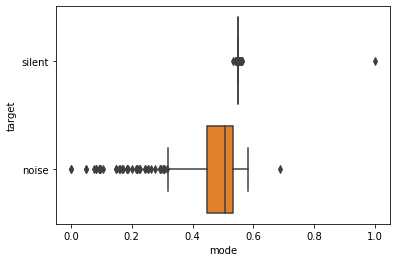

In [17]:
sns.boxplot(x=df['mode'],y=target)

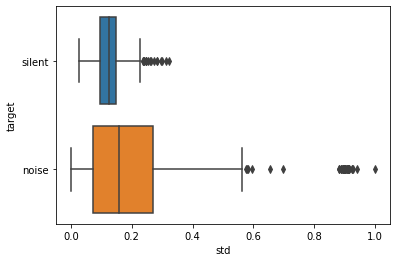

In [18]:
sns.boxplot(x=df['std'],y=target)

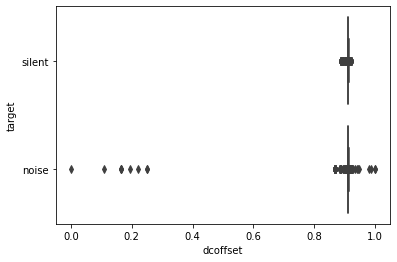

In [30]:
sns.boxplot(x=df['dcoffset'],y=target)

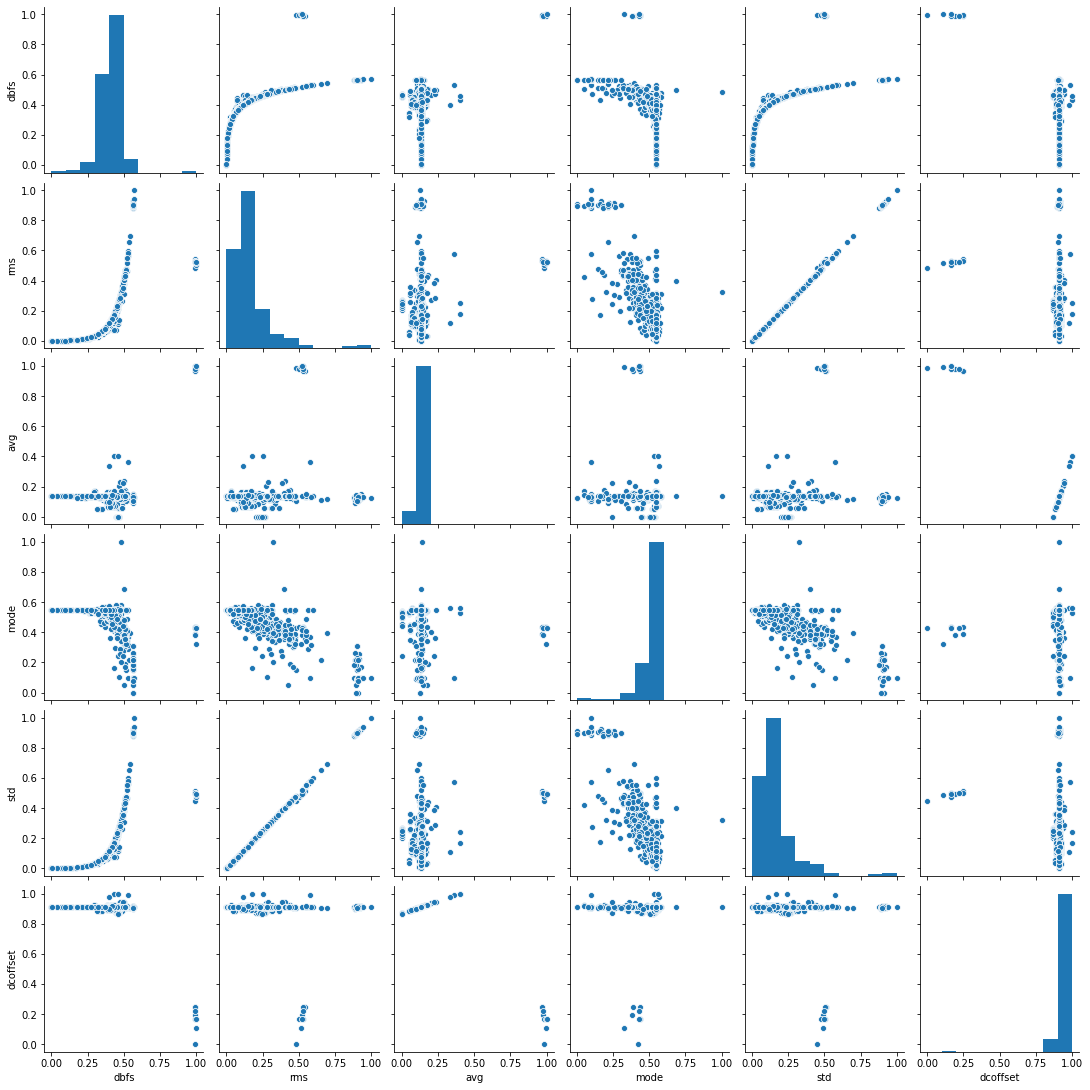

In [32]:
sns.pairplot(df)

In [63]:
# Changing the target value in the form of 0 and 1 
target2=[]
for i in target:
  if i=='silent':
    target2.append(0)
  else:
    target2.append(1)

In [64]:
# Using DecisionTree Classifier
# CrossValidation 
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
clf = DecisionTreeClassifier(random_state=0)
cross_val_score(clf,df,target,cv=10)

array([0.98 , 0.99 , 0.965, 0.965, 0.96 , 0.96 , 0.975, 0.97 , 0.965,
       0.985])

In [65]:
# Importing Validation file and Preprocessing
val = pd.read_csv('validation.csv')
val.head()
val=val.drop('filename', axis=1)
val_tar = val['target']
val=val.drop('target', axis=1)
val = std_scale.fit_transform(val)
val = pd.DataFrame(data = val, columns = columns)
val.describe()
target3=[]
for i in val_tar:
  if i=='silent':
    target3.append(0)
  else:
    target3.append(1)

In [66]:
# Training The model and predicting it
# Finding Confusing Matrix and accuracy
clf.fit(df,target2)
y = clf.predict(val)
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score  
print("Confusion Matrix: ")
print(confusion_matrix(target3, y)) 
print("Accuracy Score: ",accuracy_score(target3,y))

Confusion Matrix: 
[[250   0]
 [ 64 186]]
Accuracy Score:  0.872


In [67]:
# Using Cross_validation_predict Score
from sklearn.model_selection import cross_val_predict
y_pred_cv = cross_val_predict(clf, val, target3, cv=10)

In [68]:
# Finding Confusing Matrix and accuracy for Cross_validation_predict
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score  
print("Confusion Matrix: ")
print(confusion_matrix(target3, y_pred_cv)) 
print("Accuracy Score: ",accuracy_score(target3,y_pred_cv))

Confusion Matrix: 
[[245   5]
 [ 11 239]]
Accuracy Score:  0.968
